### DataSet: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### Data Preparation 

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df['flag']=1

In [9]:
test=pd.read_csv('test.csv')

In [10]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [11]:
test.shape

(367, 12)

In [12]:
test['flag']=0

In [13]:
df=df.append(test)

### EDA

In [14]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Loan_Status vs ApplicantIncome

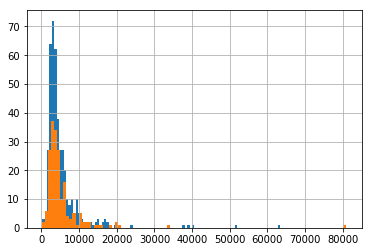

In [15]:
df[df['Loan_Status']=='Y']['ApplicantIncome'].hist(bins=100)
df[df['Loan_Status']=='N']['ApplicantIncome'].hist(bins=100)

In [16]:
df.groupby('Loan_Status').ApplicantIncome.describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
N,192.0,5446.078125,6819.558528,150.0,2885.0,3833.5,5861.25,81000.0
Y,422.0,5384.068720,5765.441615,210.0,2877.5,3812.5,5771.50,63337.0


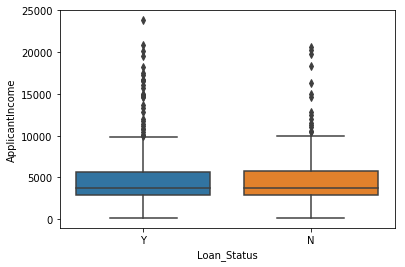

In [17]:
sns.boxplot(data=df[df['ApplicantIncome']<30000], x='Loan_Status', y= 'ApplicantIncome')

In [18]:
df['ApplicantIncome']=df['ApplicantIncome'].fillna(df['ApplicantIncome'].median())

In [19]:
df['logincome']=np.log(df['ApplicantIncome']+1)

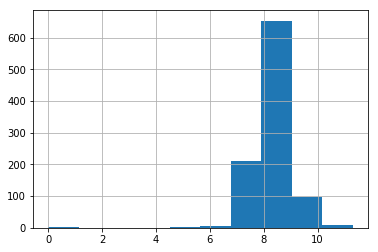

In [20]:
df['logincome'].hist()

### CoapplicantIncome Vs Loan_Status

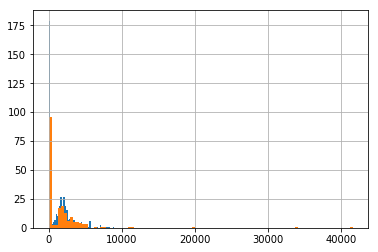

In [21]:
df[df['Loan_Status']=='Y']['CoapplicantIncome'].hist(bins=100)
df[df['Loan_Status']=='N']['CoapplicantIncome'].hist(bins=100)

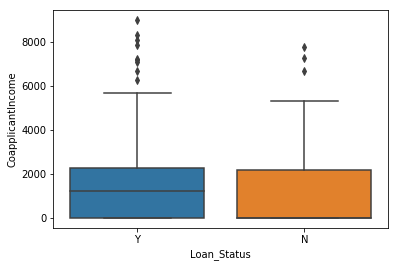

In [22]:
sns.boxplot(data=df[df['CoapplicantIncome']<10000], x='Loan_Status', y= 'CoapplicantIncome')

In [23]:
df.groupby('Loan_Status').CoapplicantIncome.mean()

Loan_Status
N    1877.807292
Y    1504.516398
Name: CoapplicantIncome, dtype: float64

In [24]:
df['logCoIncome']=np.log(df['CoapplicantIncome']+1)

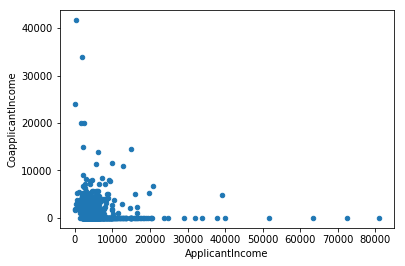

In [25]:
df.plot(kind='scatter', y='CoapplicantIncome', x = 'ApplicantIncome' )

### LoanAmount Vs Loan Status

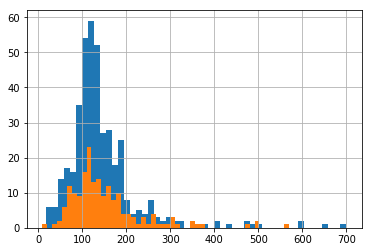

In [26]:
df[df['Loan_Status']=='Y']['LoanAmount'].hist(bins=50)
df[df['Loan_Status']=='N']['LoanAmount'].hist(bins=50)

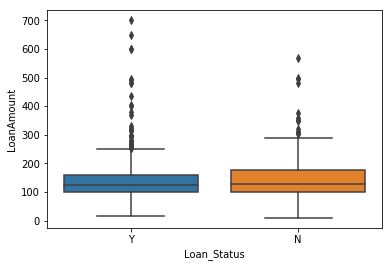

In [27]:
sns.boxplot(data=df, x='Loan_Status', y= 'LoanAmount')

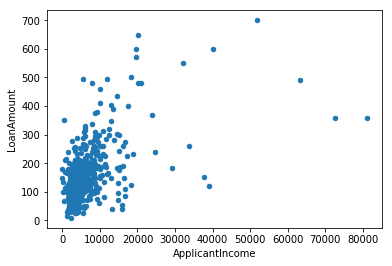

In [28]:
df.plot(kind='scatter', y='LoanAmount', x = 'ApplicantIncome' )

In [29]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [30]:
df['logLoanAmount'] = np.log(df['LoanAmount'])

### Credit_History Vs Loan Status

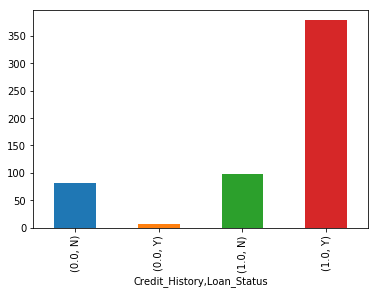

In [31]:
df.groupby(['Credit_History','Loan_Status']).Loan_ID.count().plot(kind='Bar')

In [32]:
df['Credit_History']=df['Credit_History'].fillna(0)

### Loan_Amount_Term vs Loan_Status

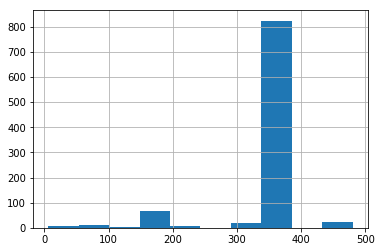

In [33]:
df.Loan_Amount_Term.hist(bins=10)

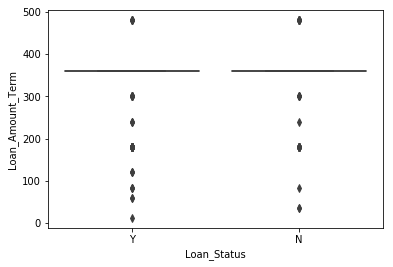

In [34]:
sns.boxplot(data = df , x= 'Loan_Status' , y='Loan_Amount_Term')

### Category vs Loan_Status

In [35]:
obj=df.select_dtypes(include = ['object'])

In [36]:
obj_list=obj.columns.tolist()

In [37]:
obj_list.remove('Loan_ID')
obj_list.remove('Loan_Status')

Dependents (3.158339770698263, 0.3678506740863211, 3, array([[107.12854758, 237.87145242],
       [ 31.67278798,  70.32721202],
       [ 31.36227045,  69.63772955],
       [ 15.83639399,  35.16360601]]))
Education (4.091490413303621, 0.04309962129357355, 1, array([[150.09771987, 329.90228013],
       [ 41.90228013,  92.09771987]]))
Gender (0.13962612116543877, 0.7086529816451106, 1, array([[ 34.84858569,  77.15141431],
       [152.15141431, 336.84858569]]))
Married (4.475019348315097, 0.03439381301579988, 1, array([[ 66.93289689, 146.06710311],
       [125.06710311, 272.93289689]]))
Property_Area (12.297623130485675, 0.0021360187811644937, 2, array([[ 55.97394137, 123.02605863],
       [ 72.85993485, 160.14006515],
       [ 63.16612378, 138.83387622]]))
Self_Employed (0.005292770110001114, 0.9420039242223718, 1, array([[157.21649485, 342.78350515],
       [ 25.78350515,  56.21649485]]))


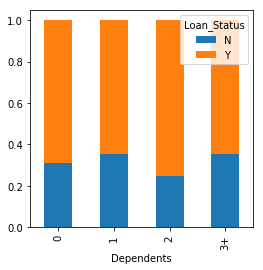

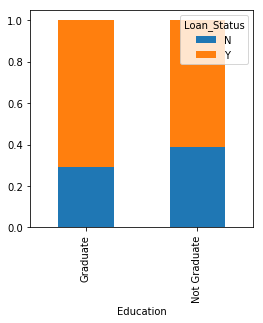

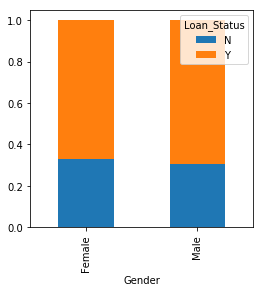

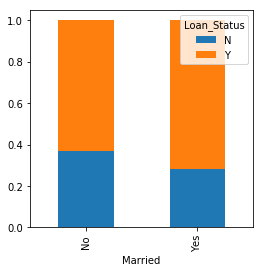

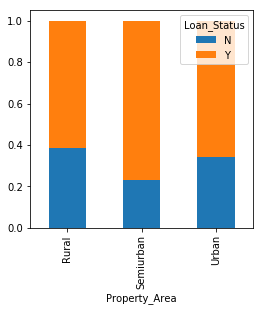

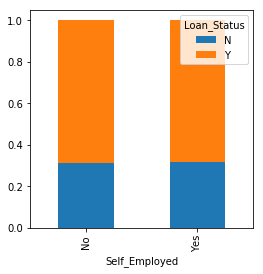

In [38]:
for a in obj_list:
    ct=pd.crosstab(df[a], df['Loan_Status'])
    ct.div(ct.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
    print(a, stats.chi2_contingency(ct))

In [39]:
df.groupby('Gender').ApplicantIncome.mean()

Gender
Female    4458.906593
Male      5256.925161
Name: ApplicantIncome, dtype: float64

### Missing Values

In [40]:
df.Dependents=df.Dependents.fillna(df.Dependents.mode()[0])

In [41]:
df.Gender=df.Gender.fillna(df.Gender.mode()[0])

In [42]:
df.Married=df.Married.fillna(df.Married.mode()[0])

In [43]:
df.Self_Employed=df.Self_Employed.fillna(df.Self_Employed.mode()[0])

In [44]:
df.Loan_Amount_Term=df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.median())

In [45]:
df.isna().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
flag                   0
logincome              0
logCoIncome            0
logLoanAmount          0
dtype: int64

### Encoding 

In [46]:
df=df.drop('Loan_ID',1)

In [47]:
df.Loan_Status=df.Loan_Status.map({'Y':1, 'N': 0})

In [48]:
df.Self_Employed=df.Self_Employed.map({'Yes':1, 'No': 0})

In [49]:
df.Married=df.Married.map({'Yes':1, 'No': 0}).astype(float)

In [50]:
df.Gender=df.Gender.map({'Male':1, 'Female': 0})

In [51]:
df.Education=df.Education.map({'Graduate':1, 'Not Graduate': 0})

In [52]:
df=pd.get_dummies(df)

### Feature Engineering

In [53]:
df['Hist_marr_Flag']= 1
df['Hist_marr_Flag']= df.Married * df.Credit_History * df['Hist_marr_Flag']

In [54]:
df['Total_log_inc'] =np.log(df.ApplicantIncome+ df.CoapplicantIncome)

In [55]:
df['Total_inc'] =(df.ApplicantIncome+ df.CoapplicantIncome)

In [56]:
df['EMI']=df['LoanAmount']/df['Loan_Amount_Term']

In [57]:
df['Balance'] = df['Total_log_inc']  - df['EMI']

In [58]:
df['Credit_Bad'] = df['Credit_History'].map(lambda c: 1 if c==0 else 0)
df['Credit_Good'] = df['Credit_History'].map(lambda c: 1 if c==1 else 0)

In [59]:
df['Debt_Income_Ratio'] =df['LoanAmount'] /  df['Total_inc'] 

In [60]:
df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Education',
       'Gender', 'LoanAmount', 'Loan_Amount_Term', 'Loan_Status', 'Married',
       'Self_Employed', 'flag', 'logincome', 'logCoIncome', 'logLoanAmount',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Hist_marr_Flag', 'Total_log_inc', 'Total_inc', 'EMI', 'Balance',
       'Credit_Bad', 'Credit_Good', 'Debt_Income_Ratio'],
      dtype='object')

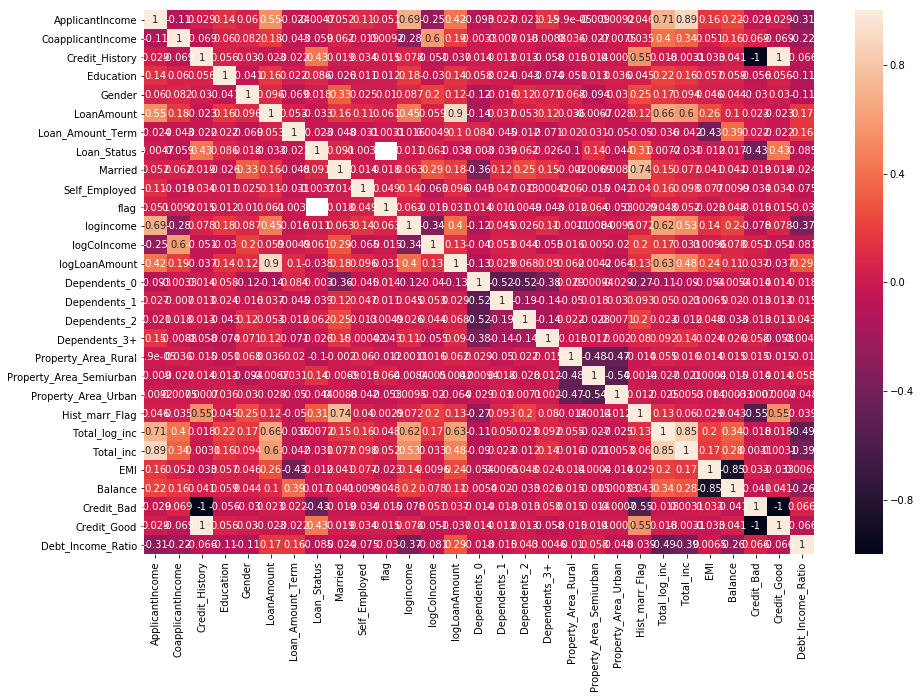

In [61]:
plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(),annot=True)

### Models 

In [62]:
X = df[df['flag']==1].drop(['Loan_Status',
                            'flag','ApplicantIncome','CoapplicantIncome','Credit_History'],1)
y = df[df['flag']==1].Loan_Status

In [63]:
'''
test = df[df['flag']==0].drop(['Loan_ID','Loan_Status','Loan_ID',
'Property_Area','flag','ApplicantIncome','CoapplicantIncome'],1)
#Submission = df[df['flag']==0][['Loan_ID','Loan_Status']]
'''

"\ntest = df[df['flag']==0].drop(['Loan_ID','Loan_Status','Loan_ID',\n'Property_Area','flag','ApplicantIncome','CoapplicantIncome'],1)\n#Submission = df[df['flag']==0][['Loan_ID','Loan_Status']]\n"

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_val, y_train, y_val = train_test_split(X,y, test_size =0.2,  random_state=123)

##### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [67]:
L_model = LogisticRegression(random_state=1234).fit(x_train, y_train)

In [68]:
L_pred_val = L_model.predict(x_val)

In [69]:
pred_val_prob = L_model.predict_proba(x_val)

In [70]:
accuracy_score(y_val,L_pred_val)

0.7723577235772358

In [71]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print(i)
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1

1
accuracy_score 0.7661290322580645
2
accuracy_score 0.75
3
accuracy_score 0.7540983606557377
4
accuracy_score 0.7786885245901639
5
accuracy_score 0.8114754098360656


##### Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [73]:
D_para_grid = {
    'max_depth' : range(2,13,2),
    'min_samples_leaf' : [5,10,20],
    'min_samples_split' : [15,20,30]
}

In [74]:
D_model = DecisionTreeClassifier(max_features = 0.5 ,random_state = 123 ).fit(x_train, y_train)

In [75]:
D_grid_search = GridSearchCV(D_model , param_grid=D_para_grid, 
                           cv = StratifiedKFold(n_splits=4,random_state=1,shuffle=True) ).fit(x_train, y_train)

In [76]:
D_grid_search.best_estimator_ , D_grid_search.best_score_

(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
             max_features=0.5, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=20, min_samples_split=15,
             min_weight_fraction_leaf=0.0, presort=False, random_state=123,
             splitter='best'), 0.7637474541751528)

In [77]:
D_model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
             max_features=0.5, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=20, min_samples_split=15,
             min_weight_fraction_leaf=0.0, presort=False, random_state=123,
             splitter='best').fit(x_train, y_train)

In [78]:
D_pred_val = D_model.predict(x_val)

In [79]:
accuracy_score(y_val,D_pred_val)

0.7642276422764228

##### Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier 

In [81]:
R_model = RandomForestClassifier()

In [82]:
score_train=[]
score_test=[]

In [83]:
for i in range(2,15,2):
    R_model = RandomForestClassifier(max_depth = i, max_features = .8, random_state= 123).fit(x_train, y_train)
    R_pred_train = R_model.predict(x_train)
    R_pred_val = R_model.predict(x_val)
    S_train=accuracy_score(y_train,R_pred_train)
    S_test=accuracy_score(y_val,R_pred_val)
    score_train.append(S_train)
    score_test.append(S_test) 

In [84]:
performance = pd.DataFrame({'max_depth':[2,4,6,8,10,12,14],'Train_acc':score_train,'Test_acc':score_test})

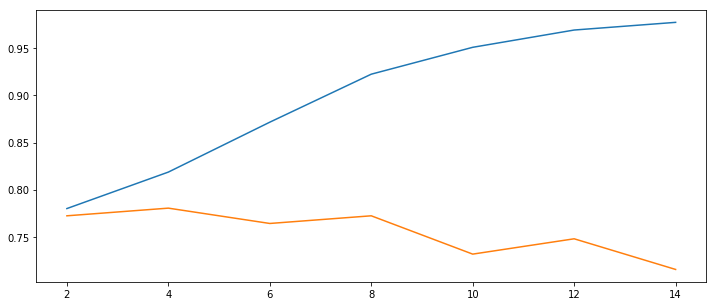

In [85]:
fig, (ax1) = plt.subplots(figsize = (12, 5))
x_axis = [2,4,6,8,10,12,14]
ax1.plot(x_axis, performance['Train_acc'], label='Train')
ax1.plot(x_axis, performance['Test_acc'], label='Test')

In [86]:
R_model=RandomForestClassifier(max_depth=4,random_state=123).fit(x_train, y_train)

In [87]:
R_para_grid = {
    'max_features' : [.6,.8],
    'n_estimators' : [50,75,100,125],
    'min_samples_leaf' : [5,10,20],
    'min_samples_split' : [15,20,30]
}

In [88]:
R_grid_search = GridSearchCV(R_model , param_grid=R_para_grid, 
                           cv = StratifiedKFold(n_splits=4,random_state=1,shuffle=True) ).fit(x_train, y_train)

In [89]:
R_grid_search.best_estimator_ , R_grid_search.best_score_

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=4, max_features=0.6, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=10, min_samples_split=30,
             min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
             oob_score=False, random_state=123, verbose=0, warm_start=False),
 0.7657841140529531)

In [90]:
R_model= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=4, max_features=0.6, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=10, min_samples_split=30,
             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
             oob_score=False, random_state=123, verbose=0, warm_start=False).fit(x_train, y_train)

In [91]:
R_pred_val = R_model.predict(x_val)

In [92]:
accuracy_score(y_val,R_pred_val)

0.7886178861788617

In [93]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(y_val,R_pred_val))

             precision    recall  f1-score   support

        0.0       0.79      0.52      0.63        42
        1.0       0.79      0.93      0.85        81

avg / total       0.79      0.79      0.78       123



In [95]:
featimp = pd.Series(R_model.feature_importances_, index=x_train.columns).sort_values(ascending=False)

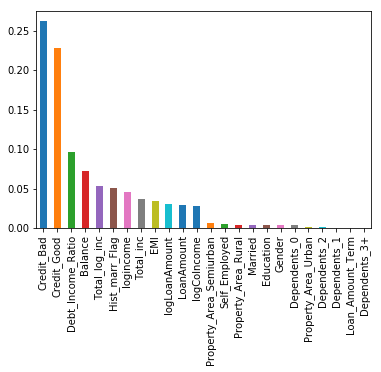

In [96]:
featimp.plot(kind='bar')

##### GBM

In [97]:
from sklearn.ensemble import GradientBoostingClassifier 

In [98]:
G_Model=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=.8, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=10, min_samples_split=30,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=123, subsample=1.0, verbose=0,
              warm_start=False).fit(x_train, y_train)

In [99]:
G_para_grid = {
    'max_depth' : [2,3,4,5,6,7,8,9,10],
    'learning_rate' : [.01,.05,.1],
    'n_estimators' : range(50,500,20),
    'max_features' : [0.6,0.8],
    'min_samples_leaf' : [5,10,15,20],
    'min_samples_split' : [10,20,30],
    'subsample' : [1,.8,.7]
}

In [100]:
G_grid_search = GridSearchCV(G_Model , param_grid=R_para_grid, 
                           cv = StratifiedKFold(n_splits=4,random_state=1,shuffle=True) ).fit(x_train, y_train)

In [101]:
G_grid_search.best_estimator_ , G_grid_search.best_score_

(GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=6,
               max_features=0.6, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=5, min_samples_split=30,
               min_weight_fraction_leaf=0.0, n_estimators=50,
               presort='auto', random_state=123, subsample=1.0, verbose=0,
               warm_start=False), 0.7413441955193483)

In [102]:
G_Model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=6,
               max_features=0.6, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=5, min_samples_split=30,
               min_weight_fraction_leaf=0.0, n_estimators=50,
               presort='auto', random_state=123, subsample=1.0, verbose=0,
               warm_start=False).fit(x_train, y_train)

In [103]:
G_pred_val = G_Model.predict(x_val)

In [104]:
accuracy_score(y_val,G_pred_val)

0.7317073170731707

In [105]:
print(classification_report(y_val,G_pred_val))

             precision    recall  f1-score   support

        0.0       0.65      0.48      0.55        42
        1.0       0.76      0.86      0.81        81

avg / total       0.72      0.73      0.72       123



##### XGBoost

In [106]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [107]:
def modelfit(alg, dtrain, y, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=y.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'],
                          nfold=cv_folds,metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], y,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y.values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y, dtrain_predprob))
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 16))
    xgb.plot_importance(alg, max_num_features=50, height=0.5, ax=ax)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.8289
AUC Score (Train): 0.891251


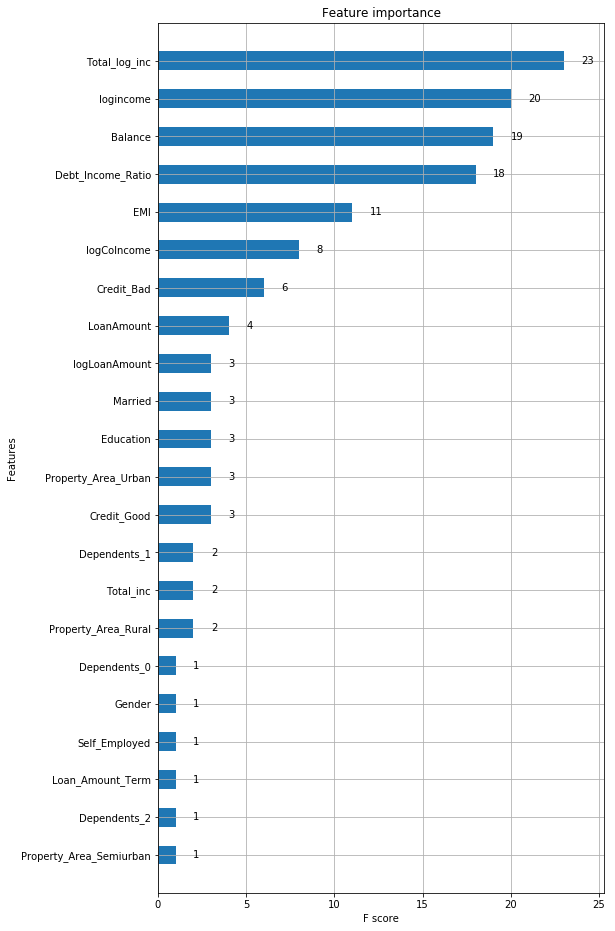

In [108]:
predictors = x_train.columns
xgb1 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8,
                     colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
modelfit(xgb1, x_train, y_train, predictors)

In [109]:
param_test1 = { 'max_depth':list(range(3,10,2)),
               'min_child_weight':list(range(1,6,2))}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5).fit(x_train, y_train)

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.70525, std: 0.08041, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.71387, std: 0.07682, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.71177, std: 0.07799, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.70061, std: 0.06984, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.70464, std: 0.06186, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.71680, std: 0.07317, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.70334, std: 0.06203, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.70213, std: 0.06855, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.71148, std: 0.07330, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.70646, std: 0.06590, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.70072, std: 0.07110, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.71173, std: 0.07223, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 5, 'min_child_weight': 5

In [112]:
param_test2 = { 'max_depth':[4,5,6,7,8], 
               'min_child_weight':[4,5,6,7] }
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5).fit(x_train, y_train)

gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.72089, std: 0.07294, params: {'max_depth': 4, 'min_child_weight': 4},
  mean: 0.70468, std: 0.07121, params: {'max_depth': 4, 'min_child_weight': 5},
  mean: 0.71400, std: 0.07276, params: {'max_depth': 4, 'min_child_weight': 6},
  mean: 0.71092, std: 0.07174, params: {'max_depth': 4, 'min_child_weight': 7},
  mean: 0.71604, std: 0.07206, params: {'max_depth': 5, 'min_child_weight': 4},
  mean: 0.71680, std: 0.07317, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.71653, std: 0.07364, params: {'max_depth': 5, 'min_child_weight': 6},
  mean: 0.71987, std: 0.07065, params: {'max_depth': 5, 'min_child_weight': 7},
  mean: 0.71850, std: 0.07071, params: {'max_depth': 6, 'min_child_weight': 4},
  mean: 0.71117, std: 0.07351, params: {'max_depth': 6, 'min_child_weight': 5},
  mean: 0.72368, std: 0.07073, params: {'max_depth': 6, 'min_child_weight': 6},
  mean: 0.71774, std: 0.07120, params: {'max_depth': 6, 'min_child_weight': 7},
  mean: 0.70974, std: 0.06099, params: {

In [113]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=7,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5).fit(x_train, y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.71931, std: 0.07042, params: {'gamma': 0.0},
  mean: 0.70917, std: 0.06941, params: {'gamma': 0.1},
  mean: 0.71856, std: 0.06764, params: {'gamma': 0.2},
  mean: 0.72135, std: 0.07286, params: {'gamma': 0.3},
  mean: 0.72281, std: 0.07044, params: {'gamma': 0.4}],
 {'gamma': 0.4},
 0.72281045751634)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.7699
AUC Score (Train): 0.852659


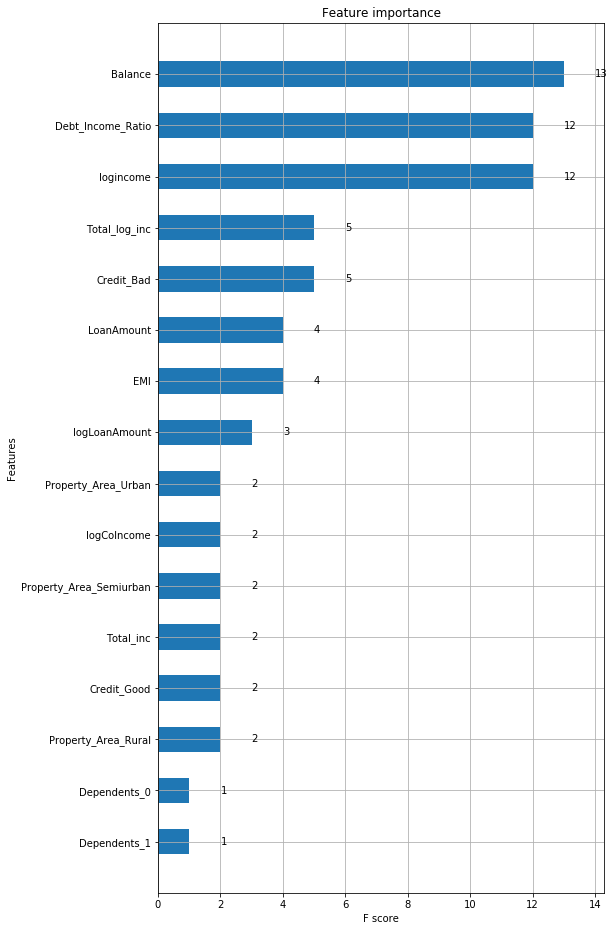

In [115]:
xgb2 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=7, min_child_weight=5, gamma=0.4, subsample=0.8,
                     colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
modelfit(xgb2, x_train, y_train, predictors)

In [118]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=500, max_depth=7,
 min_child_weight=6, gamma=0.4, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5).fit(x_train, y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.70991, std: 0.07087, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.70458, std: 0.06895, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.70590, std: 0.06836, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.70843, std: 0.06587, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.70947, std: 0.06686, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.70307, std: 0.06628, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.70094, std: 0.06866, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.70889, std: 0.06792, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.71825, std: 0.06607, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.70369, std: 0.06853, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.72105, std: 0.06800, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.70149, std: 0.06942, params: {'colsample_bytree': 0.8, 'subsample'

In [149]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=500, max_depth=7,
 min_child_weight=6, gamma=0.4, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5).fit(x_train, y_train)
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.70781, std: 0.06860, params: {'reg_alpha': 1e-05},
  mean: 0.70811, std: 0.06817, params: {'reg_alpha': 0.01},
  mean: 0.71191, std: 0.06732, params: {'reg_alpha': 0.1},
  mean: 0.71124, std: 0.06519, params: {'reg_alpha': 1},
  mean: 0.50000, std: 0.00000, params: {'reg_alpha': 100}],
 {'reg_alpha': 0.1},
 0.7119110542767831)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.7637
AUC Score (Train): 0.843646


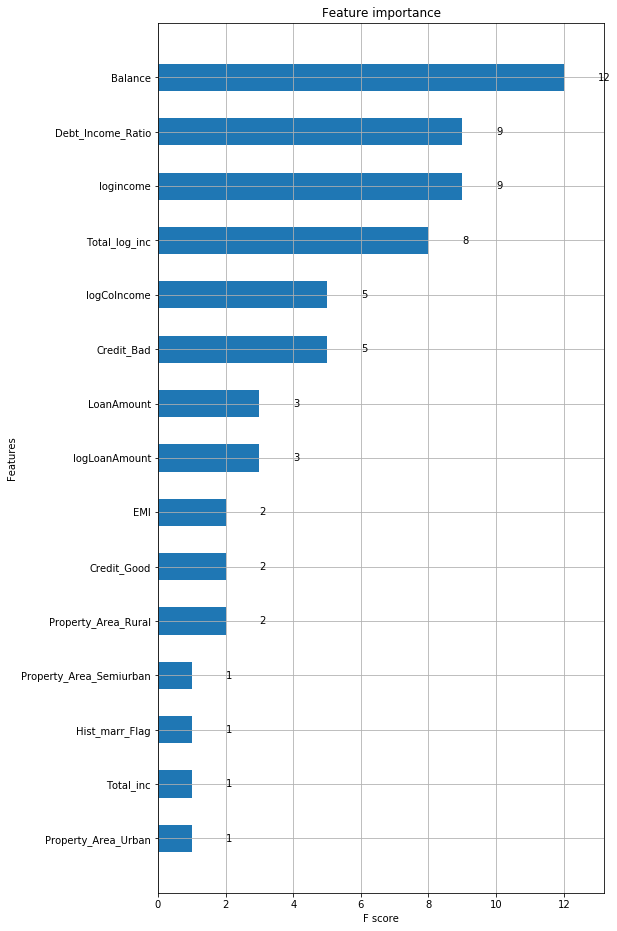

In [119]:
xgb3 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=7, min_child_weight=6, gamma=0.4, subsample=0.8,
                     colsample_bytree=0.8, reg_alpha=0.1, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
modelfit(xgb3,  x_train, y_train, predictors)